# **Application of Deep Neural Netwok**
## Topic: Generative Adversarial Networks

Summary: GANS to Enhance Old Photographs using Deoldify

The application is named deoldify, which uses a PyTorche-based GAN to transform old photographs into more modern-looking images. The complete source code to [Deoldify](https://github.com/dana-kelley/DeOldify) is provided.

# Clone Deolify repository

In [6]:
# HIDE OUTPUT
!git clone https://github.com/jantic/DeOldify.git DeOldify

Cloning into 'DeOldify'...
remote: Enumerating objects: 2606, done.
remote: Counting objects: 100% (260/260), done.
remote: Compressing objects: 100% (182/182), done.
remote: Total 2606 (delta 85), reused 208 (delta 71), pack-reused 2346
Receiving objects: 100% (2606/2606), 69.71 MiB | 16.08 MiB/s, done.
Resolving deltas: 100% (1166/1166), done.


In [7]:
%cd DeOldify/

/content/DeOldify


In [8]:
# HIDE OUTPUT
!pip install -r requirements-colab.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.4/631.4 kB 44.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 36.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 101.7 MB/s eta 0:00:00
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654002 sha256=4efece46bce48523088af51d4048a2875e776d3031527a5674b21e5b6f512e77
  Stored in directory: /root/.cache/pip/whe

In [9]:

# HIDE OUTPUT
!mkdir './models/'

mkdir: cannot create directory ‘./models/’: File exists


In [10]:
CMD = "wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth"\
  " -O ./models/ColorizeArtistic_gen.pth"

In [11]:
!{CMD}

--2023-09-12 14:25:56--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 169.150.207.217, 2400:52e0:1500::1024:1
Connecting to data.deepai.org (data.deepai.org)|169.150.207.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  4.93MB/s    in 50s     

2023-09-12 14:26:45 (4.88 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



# Torch Device Initialization
First, we must initialize a Torch device. If we have a GPU available, we will detect it here. I assume that you will run this code from Google CoLab, with a GPU. It is possible to run this code from a local GPU; however, some modification will be necessary.

In [12]:
import sys

#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
  print('GPU not available.')
else:
  print('Using GPU.')

Using GPU.


The model can now be called. I'm going to enhance a photo from my early years, perhaps taken around late 1990. Me and my brother are shown in the photo. Overall, a remarkable development.

In [23]:
# HIDE OUTPUT
import fastai
from deoldify.visualize import *
import warnings
from urllib.parse import urlparse
import os

warnings.filterwarnings("ignore", category=UserWarning,
          message=".*?Your .*? set is empty.*?")


#before_file = '/content/models/brother_sister.jpeg'
before_file = '/content/models/brothers.jpeg'
RENDER_FACTOR = 35
WATERMARK = False

colorizer = get_image_colorizer(artistic=True)

after_image = colorizer.get_transformed_image(
    before_file, render_factor=RENDER_FACTOR,
    watermarked=WATERMARK)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can als

Old Image is here

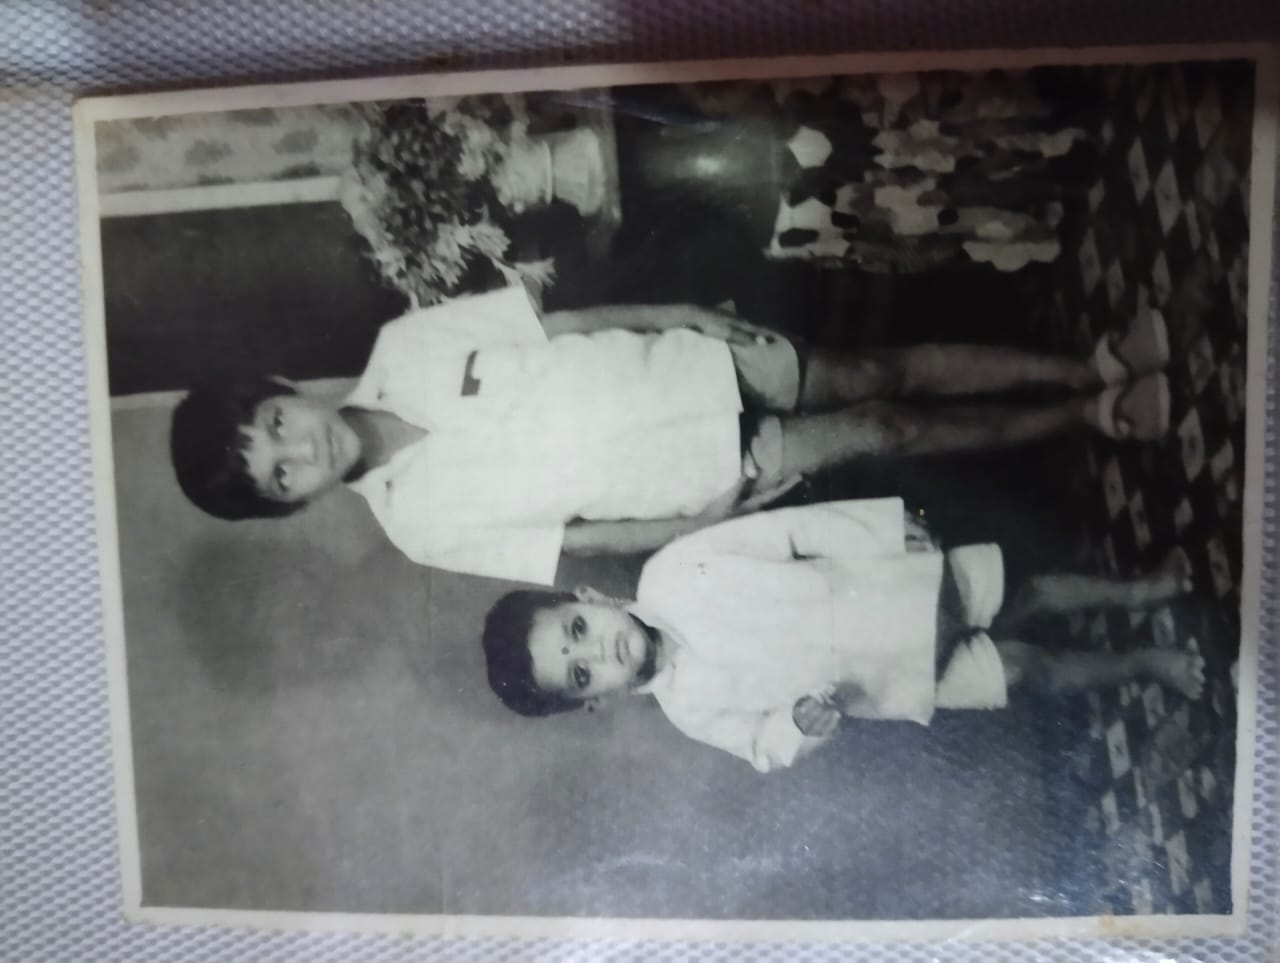

In [24]:
from IPython import display
display.Image(before_file)

New Image after Deolify usage

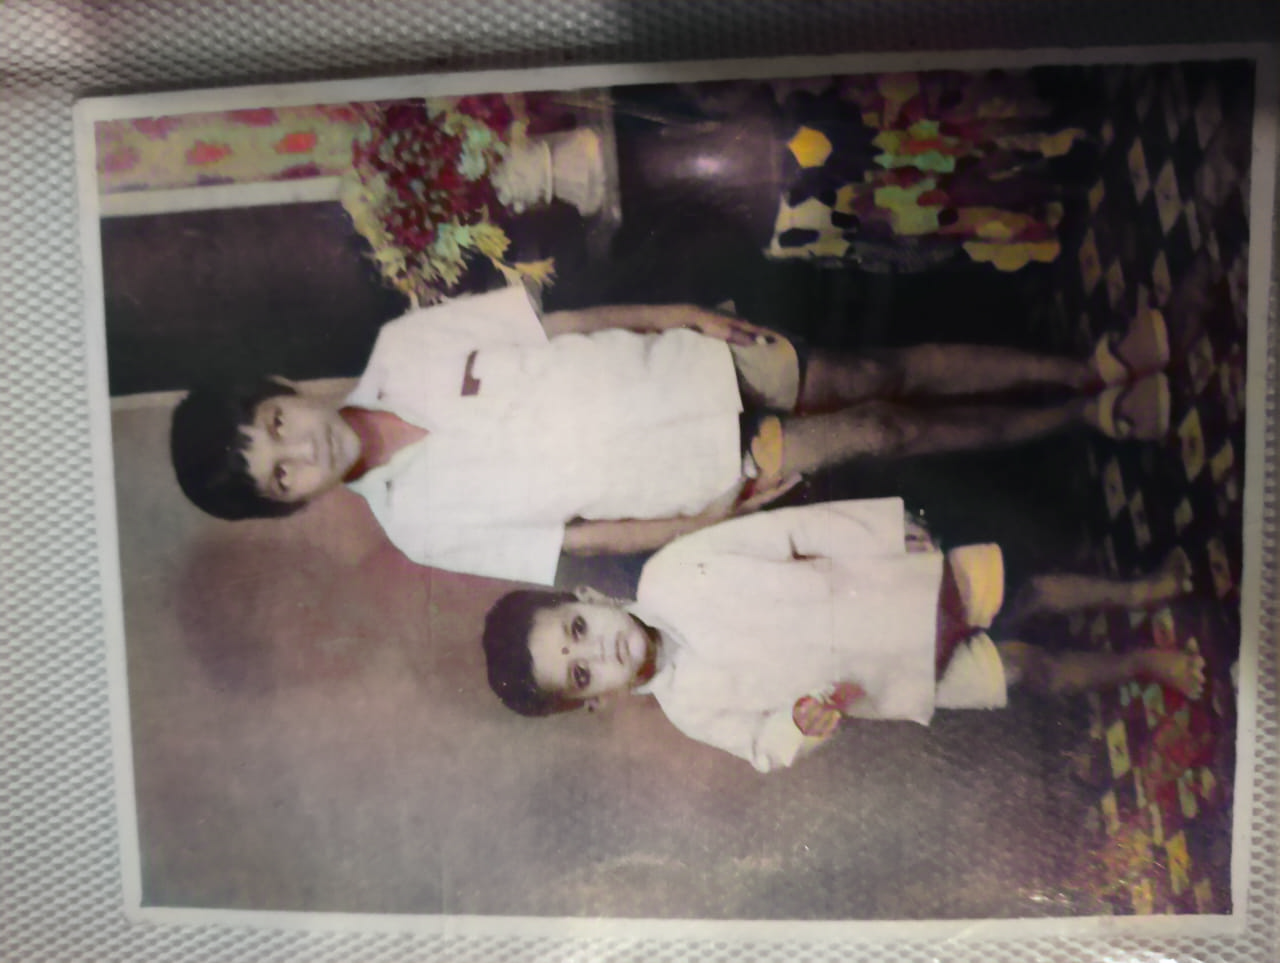

In [25]:
after_image